In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from time import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:

def create_model():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

def train_model(optimizer_name, lr=0.01, X_train=None, y_train=None, X_val=None, y_val=None, epochs=50):
  start_time = time()
  batch_size = None
  model = create_model()
  if optimizer_name == "SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 1
  elif optimizer_name == "Mini-batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = 64
  elif optimizer_name == "Batch SGD":
    optimizer = SGD(lr=lr, weight_decay=0, momentum=0.0)
    batch_size = X_train.shape[0]
  elif optimizer_name == "Mini-batch SGD with Decay":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.0)
  elif optimizer_name == "SGD with Decay and Momentum":
    optimizer = SGD(lr=lr, weight_decay=1e-6, momentum=0.9)
    batch_size = 1
  elif optimizer_name == "Adam":
    optimizer = Adam(lr=lr)
  elif optimizer_name == "RMSprop":
    optimizer = RMSprop(lr=lr)
  else:
    raise ValueError(f"Invalid optimizer name: {optimizer_name}")
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  print(batch_size)
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)
  end_time = time()
  training_time = end_time - start_time

  # Track best model based on validation accuracy
  best_model = model
  best_val_acc = max(history.history['val_accuracy'])
  for i in range(len(history.history['val_accuracy'])):
    if history.history['val_accuracy'][i] == best_val_acc:
      best_model = model.get_weights()
      break

  # Plot learning curves
  plt.plot(history.history['loss'], label=f'Training Loss ({optimizer_name})')
  plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer_name})')
  plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
  plt.title(f'Learning Curves ({optimizer_name})')
  plt.xlabel('Epoch')
  plt.ylabel('Loss/Accuracy')
  plt.legend()
  plt.show()

  return history, training_time, best_model

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)


SGD



1
Epoch 1/50



48000/48000 [==============================] - 82s 2ms/step - loss: 0.2515 - accuracy: 0.9241 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 2/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.1209 - accuracy: 0.9626 - val_loss: 0.1036 - val_accuracy: 0.9704
Epoch 3/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0853 - accuracy: 0.9723 - val_loss: 0.1231 - val_accuracy: 0.9666
Epoch 4/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.1047 - val_accuracy: 0.9709
Epoch 5/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.1236 - val_accuracy: 0.9676
Epoch 6/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 7/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.1232 - val

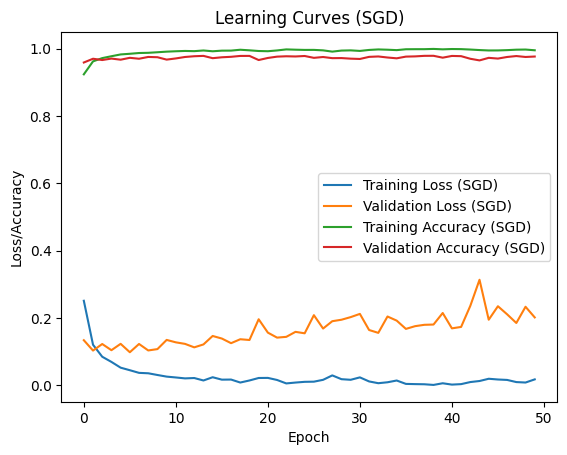

Mini-batch SGD
64
Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 0.9989 - accuracy: 0.7431 - val_loss: 0.4832 - val_accuracy: 0.8712
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4013 - accuracy: 0.8900 - val_loss: 0.3613 - val_accuracy: 0.9029
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3263 - accuracy: 0.9068 - val_loss: 0.3112 - val_accuracy: 0.9149
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2904 - accuracy: 0.9167 - val_loss: 0.2850 - val_accuracy: 0.9210
Epoch 5/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2654 - accuracy: 0.9239 - val_loss: 0.2637 - val_accuracy: 0.9268
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.2463 - accuracy: 0.9289 - val_loss: 0.2469 - val_accuracy: 0.9320
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2301 - accuracy: 0.9343 - val_loss: 0.2364 - val_accur

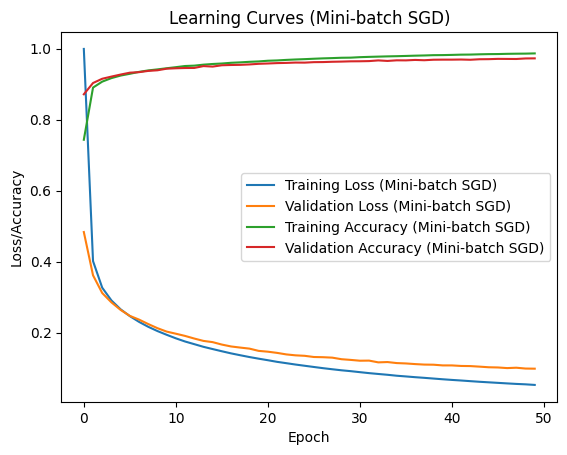

Batch SGD
48000
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.3429 - accuracy: 0.1091 - val_loss: 2.3354 - val_accuracy: 0.1160
Epoch 2/50
1/1 [==============================] - 0s 152ms/step - loss: 2.3374 - accuracy: 0.1128 - val_loss: 2.3301 - val_accuracy: 0.1190
Epoch 3/50
1/1 [==============================] - 0s 195ms/step - loss: 2.3321 - accuracy: 0.1158 - val_loss: 2.3249 - val_accuracy: 0.1217
Epoch 4/50
1/1 [==============================] - 0s 190ms/step - loss: 2.3268 - accuracy: 0.1193 - val_loss: 2.3198 - val_accuracy: 0.1251
Epoch 5/50
1/1 [==============================] - 0s 183ms/step - loss: 2.3217 - accuracy: 0.1225 - val_loss: 2.3148 - val_accuracy: 0.1287
Epoch 6/50
1/1 [==============================] - 0s 213ms/step - loss: 2.3166 - accuracy: 0.1263 - val_loss: 2.3098 - val_accuracy: 0.1327
Epoch 7/50
1/1 [==============================] - 0s 215ms/step - loss: 2.3116 - accuracy: 0.1303 - val_loss: 2.3050 - val_accuracy: 0.1373
Epoch 8

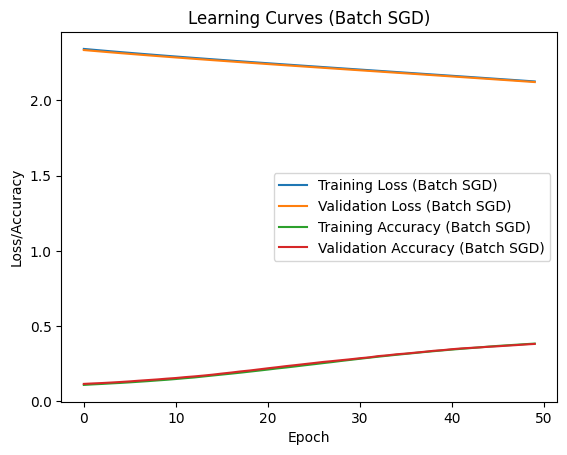

Mini-batch SGD with Decay
None
Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7413 - accuracy: 0.7991 - val_loss: 0.3640 - val_accuracy: 0.9003
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.9090 - val_loss: 0.2899 - val_accuracy: 0.9208
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9247 - val_loss: 0.2519 - val_accuracy: 0.9312
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9344 - val_loss: 0.2315 - val_accuracy: 0.9354
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2072 - accuracy: 0.9410 - val_loss: 0.2094 - val_accuracy: 0.9423
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.1917 - val_accuracy: 0.9454
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1719 - accuracy: 0.9508 - v

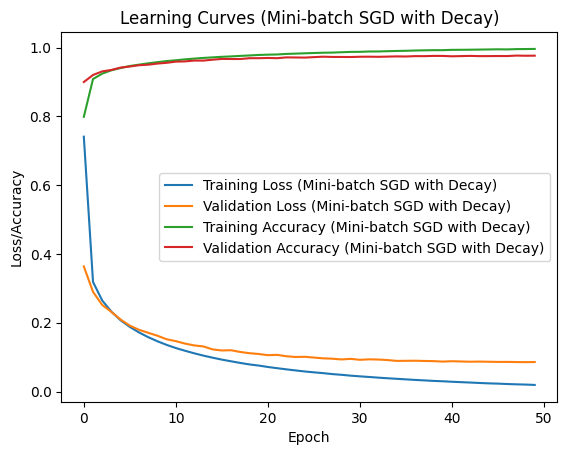

SGD with Decay and Momentum
1
Epoch 1/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.2172 - accuracy: 0.1611 - val_loss: 2.3228 - val_accuracy: 0.1027
Epoch 2/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.3238 - accuracy: 0.1006 - val_loss: 2.3239 - val_accuracy: 0.0992
Epoch 3/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3238 - accuracy: 0.1030 - val_loss: 2.3298 - val_accuracy: 0.0966
Epoch 4/50
48000/48000 [==============================] - 101s 2ms/step - loss: 2.3231 - accuracy: 0.1029 - val_loss: 2.3200 - val_accuracy: 0.0992
Epoch 5/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3239 - accuracy: 0.1010 - val_loss: 2.3121 - val_accuracy: 0.1018
Epoch 6/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3237 - accuracy: 0.1018 - val_loss: 2.3124 - val_accuracy: 0.1018
Epoch 7/50
48000/48000 [==============================] - 95s 2ms/step - loss: 2.3239 -

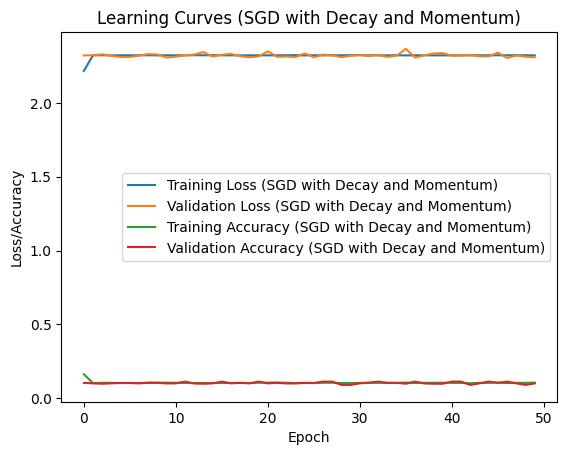

Adam
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9222 - val_loss: 0.1546 - val_accuracy: 0.9527
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9749 - val_loss: 0.1042 - val_accuracy: 0.9703
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0871 - val_accuracy: 0.9758
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0937 - val_accuracy: 0.9746
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0916 - val_accuracy: 0.9742
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.1011 - val

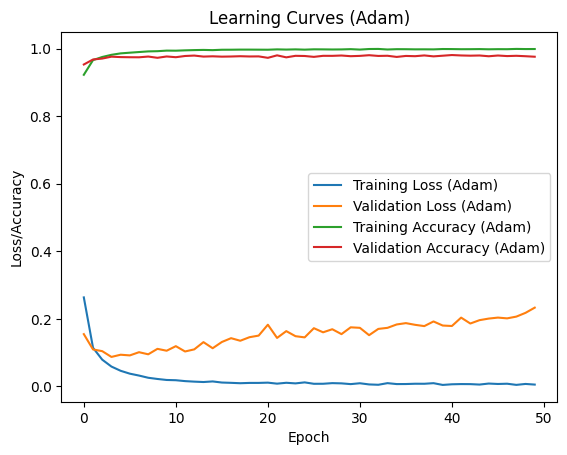

RMSprop
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9217 - val_loss: 0.1595 - val_accuracy: 0.9520
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1166 - accuracy: 0.9656 - val_loss: 0.1154 - val_accuracy: 0.9680
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0891 - val_accuracy: 0.9764
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.1227 - val_accuracy: 0.9716
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.0988 - val_accuracy: 0.9770
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.1092 - 

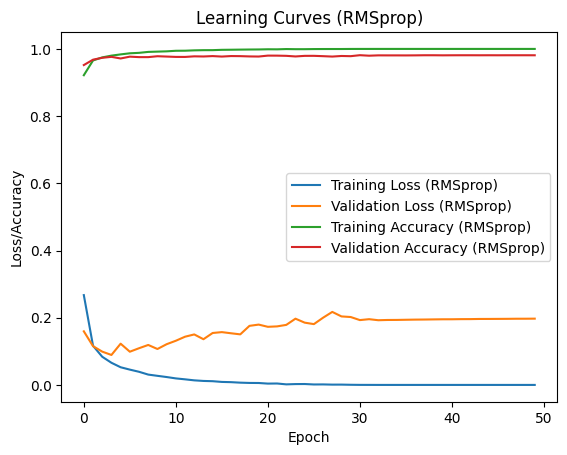

Training Time Comparison:
SGD: 5025.03 seconds
Mini-batch SGD: 139.74 seconds
Batch SGD: 10.93 seconds
Mini-batch SGD with Decay: 182.34 seconds
SGD with Decay and Momentum: 4834.96 seconds
Adam: 203.43 seconds
RMSprop: 192.66 seconds


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step
Predicted Class for Sample 1: 4
Predicted Class for Sample 2: 4


In [3]:
# Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

# Train models with different optimizers
optimizers = ["SGD", "Mini-batch SGD", "Batch SGD", "Mini-batch SGD with Decay", "SGD with Decay and Momentum", "Adam", "RMSprop"]
training_times = {}
best_models = {}
for optimizer in optimizers:
  print(optimizer)
  history, training_time, best_model = train_model(optimizer, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
  training_times[optimizer] = training_time
  best_models[optimizer] = best_model

# Print training times
print("Training Time Comparison:")
for optimizer, time in training_times.items():
  print(f"{optimizer}: {time:.2f} seconds")

# Select the best model based on validation accuracy 
best_model_weights = best_models["RMSprop"]

# Save the best model (weights only)
model = create_model()
model.set_weights(best_model_weights)
model.save("best_model.h5")

# Define a function to load the model (optional, for reusability)
def load_model(filepath):
  model = create_model()
  model.load_weights(filepath)
  return model

# Load the exported model
loaded_model = load_model("best_model.h5")

# Prepare some test set samples for prediction
test_sample1 = test_images[0]  # Select a sample from the test set
test_sample2 = test_images[1]  # Select another sample for prediction

# Make predictions on the test samples
predictions1 = loaded_model.predict(np.array([test_sample1]))  # Reshape for single sample prediction
predictions2 = loaded_model.predict(np.array([test_sample2]))

# Print the predicted class labels (assuming predictions have probabilities)
predicted_class1 = np.argmax(predictions1[0])
predicted_class2 = np.argmax(predictions2[0])
print(f"Predicted Class for Sample 1: {predicted_class1}")
print(f"Predicted Class for Sample 2: {predicted_class2}")


In [39]:
SGD_string = '''
SGD
1
Epoch 1/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2515 - accuracy: 0.9241 - val_loss: 0.1344 - val_accuracy: 0.9592
Epoch 2/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.1209 - accuracy: 0.9626 - val_loss: 0.1036 - val_accuracy: 0.9704
Epoch 3/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0853 - accuracy: 0.9723 - val_loss: 0.1231 - val_accuracy: 0.9666
Epoch 4/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.1047 - val_accuracy: 0.9709
Epoch 5/50
48000/48000 [==============================] - 84s 2ms/step - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.1236 - val_accuracy: 0.9676
Epoch 6/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0453 - accuracy: 0.9851 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 7/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.1232 - val_accuracy: 0.9704
Epoch 8/50
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.1040 - val_accuracy: 0.9758
Epoch 9/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0311 - accuracy: 0.9897 - val_loss: 0.1080 - val_accuracy: 0.9749
Epoch 10/50
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.1353 - val_accuracy: 0.9678
Epoch 11/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.1281 - val_accuracy: 0.9713
Epoch 12/50
48000/48000 [==============================] - 83s 2ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.1235 - val_accuracy: 0.9757
Epoch 13/50
48000/48000 [==============================] - 82s 2ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.1132 - val_accuracy: 0.9778
Epoch 14/50
48000/48000 [==============================] - 105s 2ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.1218 - val_accuracy: 0.9789
Epoch 15/50
48000/48000 [==============================] - 125s 3ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.1470 - val_accuracy: 0.9721
Epoch 16/50
48000/48000 [==============================] - 136s 3ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.1393 - val_accuracy: 0.9747
Epoch 17/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.1256 - val_accuracy: 0.9762
Epoch 18/50
48000/48000 [==============================] - 134s 3ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.1373 - val_accuracy: 0.9787
Epoch 19/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.1350 - val_accuracy: 0.9788
Epoch 20/50
48000/48000 [==============================] - 125s 3ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.1966 - val_accuracy: 0.9666
Epoch 21/50
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.1569 - val_accuracy: 0.9728
Epoch 22/50
48000/48000 [==============================] - 115s 2ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.1421 - val_accuracy: 0.9767
Epoch 23/50
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1444 - val_accuracy: 0.9778
Epoch 24/50
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.1592 - val_accuracy: 0.9772
Epoch 25/50
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.1549 - val_accuracy: 0.9786
Epoch 26/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.2087 - val_accuracy: 0.9731
Epoch 27/50
48000/48000 [==============================] - 92s 2ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.1690 - val_accuracy: 0.9756
Epoch 28/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.1908 - val_accuracy: 0.9722
Epoch 29/50
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.1952 - val_accuracy: 0.9724
Epoch 30/50
48000/48000 [==============================] - 114s 2ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.2030 - val_accuracy: 0.9707
Epoch 31/50
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0240 - accuracy: 0.9936 - val_loss: 0.2125 - val_accuracy: 0.9697
Epoch 32/50
48000/48000 [==============================] - 110s 2ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1647 - val_accuracy: 0.9760
Epoch 33/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.1562 - val_accuracy: 0.9772
Epoch 34/50
48000/48000 [==============================] - 91s 2ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.2048 - val_accuracy: 0.9741
Epoch 35/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.1926 - val_accuracy: 0.9717
Epoch 36/50
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.1680 - val_accuracy: 0.9768
Epoch 37/50
48000/48000 [==============================] - 96s 2ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1761 - val_accuracy: 0.9774
Epoch 38/50
48000/48000 [==============================] - 106s 2ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1801 - val_accuracy: 0.9790
Epoch 39/50
48000/48000 [==============================] - 99s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1809 - val_accuracy: 0.9792
Epoch 40/50
48000/48000 [==============================] - 140s 3ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.2152 - val_accuracy: 0.9736
Epoch 41/50
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1696 - val_accuracy: 0.9787
Epoch 42/50
48000/48000 [==============================] - 110s 2ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1738 - val_accuracy: 0.9781
Epoch 43/50
48000/48000 [==============================] - 100s 2ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.2365 - val_accuracy: 0.9703
Epoch 44/50
48000/48000 [==============================] - 94s 2ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.3139 - val_accuracy: 0.9655
Epoch 45/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.1953 - val_accuracy: 0.9731
Epoch 46/50
48000/48000 [==============================] - 97s 2ms/step - loss: 0.0177 - accuracy: 0.9951 - val_loss: 0.2353 - val_accuracy: 0.9709
Epoch 47/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.2113 - val_accuracy: 0.9757
Epoch 48/50
48000/48000 [==============================] - 93s 2ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.1855 - val_accuracy: 0.9784
Epoch 49/50
48000/48000 [==============================] - 159s 3ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 0.2337 - val_accuracy: 0.9757
Epoch 50/50
48000/48000 [==============================] - 171s 4ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.2021 - val_accuracy: 0.9770'''

Mini_batch_SGD_string = '''WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.
Mini-batch SGD
64
Epoch 1/50
750/750 [==============================] - 5s 5ms/step - loss: 0.9989 - accuracy: 0.7431 - val_loss: 0.4832 - val_accuracy: 0.8712
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.4013 - accuracy: 0.8900 - val_loss: 0.3613 - val_accuracy: 0.9029
Epoch 3/50
750/750 [==============================] - 4s 5ms/step - loss: 0.3263 - accuracy: 0.9068 - val_loss: 0.3112 - val_accuracy: 0.9149
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2904 - accuracy: 0.9167 - val_loss: 0.2850 - val_accuracy: 0.9210
Epoch 5/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2654 - accuracy: 0.9239 - val_loss: 0.2637 - val_accuracy: 0.9268
Epoch 6/50
750/750 [==============================] - 3s 3ms/step - loss: 0.2463 - accuracy: 0.9289 - val_loss: 0.2469 - val_accuracy: 0.9320
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2301 - accuracy: 0.9343 - val_loss: 0.2364 - val_accuracy: 0.9335
Epoch 8/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2162 - accuracy: 0.9384 - val_loss: 0.2239 - val_accuracy: 0.9370
Epoch 9/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2042 - accuracy: 0.9413 - val_loss: 0.2123 - val_accuracy: 0.9388
Epoch 10/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1937 - accuracy: 0.9445 - val_loss: 0.2027 - val_accuracy: 0.9433
Epoch 11/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1837 - accuracy: 0.9475 - val_loss: 0.1967 - val_accuracy: 0.9444
Epoch 12/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1748 - accuracy: 0.9508 - val_loss: 0.1905 - val_accuracy: 0.9452
Epoch 13/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1673 - accuracy: 0.9518 - val_loss: 0.1831 - val_accuracy: 0.9453
Epoch 14/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1598 - accuracy: 0.9546 - val_loss: 0.1764 - val_accuracy: 0.9506
Epoch 15/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9565 - val_loss: 0.1730 - val_accuracy: 0.9492
Epoch 16/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1473 - accuracy: 0.9578 - val_loss: 0.1661 - val_accuracy: 0.9529
Epoch 17/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1413 - accuracy: 0.9599 - val_loss: 0.1608 - val_accuracy: 0.9537
Epoch 18/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1360 - accuracy: 0.9611 - val_loss: 0.1576 - val_accuracy: 0.9541
Epoch 19/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1310 - accuracy: 0.9626 - val_loss: 0.1547 - val_accuracy: 0.9553
Epoch 20/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1264 - accuracy: 0.9637 - val_loss: 0.1483 - val_accuracy: 0.9570
Epoch 21/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1220 - accuracy: 0.9656 - val_loss: 0.1461 - val_accuracy: 0.9579
Epoch 22/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1175 - accuracy: 0.9665 - val_loss: 0.1427 - val_accuracy: 0.9590
Epoch 23/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1137 - accuracy: 0.9680 - val_loss: 0.1384 - val_accuracy: 0.9596
Epoch 24/50
750/750 [==============================] - 3s 5ms/step - loss: 0.1099 - accuracy: 0.9692 - val_loss: 0.1358 - val_accuracy: 0.9605
Epoch 25/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1064 - accuracy: 0.9701 - val_loss: 0.1344 - val_accuracy: 0.9603
Epoch 26/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1030 - accuracy: 0.9713 - val_loss: 0.1311 - val_accuracy: 0.9617
Epoch 27/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0996 - accuracy: 0.9723 - val_loss: 0.1305 - val_accuracy: 0.9619
Epoch 28/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0966 - accuracy: 0.9731 - val_loss: 0.1293 - val_accuracy: 0.9628
Epoch 29/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0937 - accuracy: 0.9740 - val_loss: 0.1249 - val_accuracy: 0.9632
Epoch 30/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0912 - accuracy: 0.9744 - val_loss: 0.1229 - val_accuracy: 0.9640
Epoch 31/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0884 - accuracy: 0.9757 - val_loss: 0.1206 - val_accuracy: 0.9642
Epoch 32/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0857 - accuracy: 0.9765 - val_loss: 0.1209 - val_accuracy: 0.9647
Epoch 33/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0833 - accuracy: 0.9772 - val_loss: 0.1160 - val_accuracy: 0.9666
Epoch 34/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0810 - accuracy: 0.9779 - val_loss: 0.1169 - val_accuracy: 0.9651
Epoch 35/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0783 - accuracy: 0.9785 - val_loss: 0.1140 - val_accuracy: 0.9668
Epoch 36/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0763 - accuracy: 0.9792 - val_loss: 0.1129 - val_accuracy: 0.9667
Epoch 37/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0742 - accuracy: 0.9799 - val_loss: 0.1111 - val_accuracy: 0.9679
Epoch 38/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0724 - accuracy: 0.9805 - val_loss: 0.1097 - val_accuracy: 0.9671
Epoch 39/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0704 - accuracy: 0.9814 - val_loss: 0.1094 - val_accuracy: 0.9685
Epoch 40/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0684 - accuracy: 0.9816 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 41/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0665 - accuracy: 0.9821 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 42/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0649 - accuracy: 0.9828 - val_loss: 0.1059 - val_accuracy: 0.9691
Epoch 43/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0630 - accuracy: 0.9830 - val_loss: 0.1055 - val_accuracy: 0.9684
Epoch 44/50
750/750 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.9838 - val_loss: 0.1039 - val_accuracy: 0.9698
Epoch 45/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.1022 - val_accuracy: 0.9701
Epoch 46/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0582 - accuracy: 0.9845 - val_loss: 0.1016 - val_accuracy: 0.9709
Epoch 47/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0567 - accuracy: 0.9851 - val_loss: 0.0998 - val_accuracy: 0.9707
Epoch 48/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0553 - accuracy: 0.9855 - val_loss: 0.1009 - val_accuracy: 0.9706
Epoch 49/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0541 - accuracy: 0.9857 - val_loss: 0.0986 - val_accuracy: 0.9721
Epoch 50/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0524 - accuracy: 0.9863 - val_loss: 0.0982 - val_accuracy: 0.9723
'''

Batch_SGD_string = '''WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.
Batch SGD
48000
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.3429 - accuracy: 0.1091 - val_loss: 2.3354 - val_accuracy: 0.1160
Epoch 2/50
1/1 [==============================] - 0s 152ms/step - loss: 2.3374 - accuracy: 0.1128 - val_loss: 2.3301 - val_accuracy: 0.1190
Epoch 3/50
1/1 [==============================] - 0s 195ms/step - loss: 2.3321 - accuracy: 0.1158 - val_loss: 2.3249 - val_accuracy: 0.1217
Epoch 4/50
1/1 [==============================] - 0s 190ms/step - loss: 2.3268 - accuracy: 0.1193 - val_loss: 2.3198 - val_accuracy: 0.1251
Epoch 5/50
1/1 [==============================] - 0s 183ms/step - loss: 2.3217 - accuracy: 0.1225 - val_loss: 2.3148 - val_accuracy: 0.1287
Epoch 6/50
1/1 [==============================] - 0s 213ms/step - loss: 2.3166 - accuracy: 0.1263 - val_loss: 2.3098 - val_accuracy: 0.1327
Epoch 7/50
1/1 [==============================] - 0s 215ms/step - loss: 2.3116 - accuracy: 0.1303 - val_loss: 2.3050 - val_accuracy: 0.1373
Epoch 8/50
1/1 [==============================] - 0s 203ms/step - loss: 2.3067 - accuracy: 0.1344 - val_loss: 2.3002 - val_accuracy: 0.1415
Epoch 9/50
1/1 [==============================] - 0s 212ms/step - loss: 2.3018 - accuracy: 0.1390 - val_loss: 2.2954 - val_accuracy: 0.1457
Epoch 10/50
1/1 [==============================] - 0s 287ms/step - loss: 2.2971 - accuracy: 0.1433 - val_loss: 2.2908 - val_accuracy: 0.1507
Epoch 11/50
1/1 [==============================] - 0s 195ms/step - loss: 2.2923 - accuracy: 0.1484 - val_loss: 2.2862 - val_accuracy: 0.1551
Epoch 12/50
1/1 [==============================] - 0s 200ms/step - loss: 2.2877 - accuracy: 0.1538 - val_loss: 2.2816 - val_accuracy: 0.1608
Epoch 13/50
1/1 [==============================] - 0s 184ms/step - loss: 2.2831 - accuracy: 0.1587 - val_loss: 2.2771 - val_accuracy: 0.1657
Epoch 14/50
1/1 [==============================] - 0s 173ms/step - loss: 2.2785 - accuracy: 0.1653 - val_loss: 2.2726 - val_accuracy: 0.1713
Epoch 15/50
1/1 [==============================] - 0s 186ms/step - loss: 2.2740 - accuracy: 0.1716 - val_loss: 2.2682 - val_accuracy: 0.1774
Epoch 16/50
1/1 [==============================] - 0s 241ms/step - loss: 2.2695 - accuracy: 0.1779 - val_loss: 2.2638 - val_accuracy: 0.1846
Epoch 17/50
1/1 [==============================] - 0s 185ms/step - loss: 2.2651 - accuracy: 0.1840 - val_loss: 2.2594 - val_accuracy: 0.1912
Epoch 18/50
1/1 [==============================] - 0s 175ms/step - loss: 2.2607 - accuracy: 0.1905 - val_loss: 2.2551 - val_accuracy: 0.1987
Epoch 19/50
1/1 [==============================] - 0s 167ms/step - loss: 2.2563 - accuracy: 0.1973 - val_loss: 2.2508 - val_accuracy: 0.2048
Epoch 20/50
1/1 [==============================] - 0s 229ms/step - loss: 2.2520 - accuracy: 0.2042 - val_loss: 2.2465 - val_accuracy: 0.2122
Epoch 21/50
1/1 [==============================] - 0s 164ms/step - loss: 2.2477 - accuracy: 0.2113 - val_loss: 2.2423 - val_accuracy: 0.2198
Epoch 22/50
1/1 [==============================] - 0s 154ms/step - loss: 2.2434 - accuracy: 0.2186 - val_loss: 2.2381 - val_accuracy: 0.2268
Epoch 23/50
1/1 [==============================] - 0s 179ms/step - loss: 2.2391 - accuracy: 0.2251 - val_loss: 2.2339 - val_accuracy: 0.2342
Epoch 24/50
1/1 [==============================] - 0s 164ms/step - loss: 2.2349 - accuracy: 0.2322 - val_loss: 2.2297 - val_accuracy: 0.2407
Epoch 25/50
1/1 [==============================] - 0s 157ms/step - loss: 2.2307 - accuracy: 0.2397 - val_loss: 2.2255 - val_accuracy: 0.2477
Epoch 26/50
1/1 [==============================] - 0s 171ms/step - loss: 2.2265 - accuracy: 0.2467 - val_loss: 2.2214 - val_accuracy: 0.2546
Epoch 27/50
1/1 [==============================] - 0s 171ms/step - loss: 2.2223 - accuracy: 0.2541 - val_loss: 2.2173 - val_accuracy: 0.2618
Epoch 28/50
1/1 [==============================] - 0s 192ms/step - loss: 2.2181 - accuracy: 0.2611 - val_loss: 2.2131 - val_accuracy: 0.2676
Epoch 29/50
1/1 [==============================] - 0s 179ms/step - loss: 2.2140 - accuracy: 0.2688 - val_loss: 2.2090 - val_accuracy: 0.2738
Epoch 30/50
1/1 [==============================] - 0s 239ms/step - loss: 2.2098 - accuracy: 0.2759 - val_loss: 2.2049 - val_accuracy: 0.2798
Epoch 31/50
1/1 [==============================] - 0s 199ms/step - loss: 2.2057 - accuracy: 0.2830 - val_loss: 2.2008 - val_accuracy: 0.2867
Epoch 32/50
1/1 [==============================] - 0s 180ms/step - loss: 2.2015 - accuracy: 0.2901 - val_loss: 2.1967 - val_accuracy: 0.2923
Epoch 33/50
1/1 [==============================] - 0s 186ms/step - loss: 2.1974 - accuracy: 0.2968 - val_loss: 2.1926 - val_accuracy: 0.3007
Epoch 34/50
1/1 [==============================] - 0s 179ms/step - loss: 2.1933 - accuracy: 0.3033 - val_loss: 2.1885 - val_accuracy: 0.3060
Epoch 35/50
1/1 [==============================] - 0s 184ms/step - loss: 2.1891 - accuracy: 0.3095 - val_loss: 2.1845 - val_accuracy: 0.3129
Epoch 36/50
1/1 [==============================] - 0s 194ms/step - loss: 2.1850 - accuracy: 0.3157 - val_loss: 2.1804 - val_accuracy: 0.3176
Epoch 37/50
1/1 [==============================] - 0s 189ms/step - loss: 2.1809 - accuracy: 0.3215 - val_loss: 2.1763 - val_accuracy: 0.3236
Epoch 38/50
1/1 [==============================] - 0s 180ms/step - loss: 2.1768 - accuracy: 0.3277 - val_loss: 2.1722 - val_accuracy: 0.3294
Epoch 39/50
1/1 [==============================] - 0s 187ms/step - loss: 2.1726 - accuracy: 0.3333 - val_loss: 2.1681 - val_accuracy: 0.3358
Epoch 40/50
1/1 [==============================] - 0s 223ms/step - loss: 2.1685 - accuracy: 0.3388 - val_loss: 2.1640 - val_accuracy: 0.3404
Epoch 41/50
1/1 [==============================] - 0s 236ms/step - loss: 2.1644 - accuracy: 0.3440 - val_loss: 2.1599 - val_accuracy: 0.3466
Epoch 42/50
1/1 [==============================] - 0s 189ms/step - loss: 2.1602 - accuracy: 0.3490 - val_loss: 2.1558 - val_accuracy: 0.3516
Epoch 43/50
1/1 [==============================] - 0s 176ms/step - loss: 2.1561 - accuracy: 0.3538 - val_loss: 2.1517 - val_accuracy: 0.3553
Epoch 44/50
1/1 [==============================] - 0s 188ms/step - loss: 2.1519 - accuracy: 0.3590 - val_loss: 2.1475 - val_accuracy: 0.3586
Epoch 45/50
1/1 [==============================] - 0s 173ms/step - loss: 2.1477 - accuracy: 0.3639 - val_loss: 2.1434 - val_accuracy: 0.3628
Epoch 46/50
1/1 [==============================] - 0s 165ms/step - loss: 2.1435 - accuracy: 0.3685 - val_loss: 2.1392 - val_accuracy: 0.3661
Epoch 47/50
1/1 [==============================] - 0s 181ms/step - loss: 2.1393 - accuracy: 0.3724 - val_loss: 2.1351 - val_accuracy: 0.3702
Epoch 48/50
1/1 [==============================] - 0s 182ms/step - loss: 2.1351 - accuracy: 0.3764 - val_loss: 2.1309 - val_accuracy: 0.3738
Epoch 49/50
1/1 [==============================] - 0s 201ms/step - loss: 2.1309 - accuracy: 0.3802 - val_loss: 2.1267 - val_accuracy: 0.3782
Epoch 50/50
1/1 [==============================] - 0s 256ms/step - loss: 2.1267 - accuracy: 0.3839 - val_loss: 2.1225 - val_accuracy: 0.3817
'''

Mini_batch_SGD_with_Decay_string = '''WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.
Mini-batch SGD with Decay
None
Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7413 - accuracy: 0.7991 - val_loss: 0.3640 - val_accuracy: 0.9003
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.9090 - val_loss: 0.2899 - val_accuracy: 0.9208
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9247 - val_loss: 0.2519 - val_accuracy: 0.9312
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2322 - accuracy: 0.9344 - val_loss: 0.2315 - val_accuracy: 0.9354
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2072 - accuracy: 0.9410 - val_loss: 0.2094 - val_accuracy: 0.9423
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.1917 - val_accuracy: 0.9454
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1719 - accuracy: 0.9508 - val_loss: 0.1796 - val_accuracy: 0.9492
Epoch 8/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1582 - accuracy: 0.9547 - val_loss: 0.1709 - val_accuracy: 0.9507
Epoch 9/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1462 - accuracy: 0.9580 - val_loss: 0.1623 - val_accuracy: 0.9539
Epoch 10/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1357 - accuracy: 0.9612 - val_loss: 0.1521 - val_accuracy: 0.9562
Epoch 11/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1266 - accuracy: 0.9636 - val_loss: 0.1466 - val_accuracy: 0.9596
Epoch 12/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1186 - accuracy: 0.9663 - val_loss: 0.1395 - val_accuracy: 0.9603
Epoch 13/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1112 - accuracy: 0.9684 - val_loss: 0.1342 - val_accuracy: 0.9627
Epoch 14/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1045 - accuracy: 0.9704 - val_loss: 0.1312 - val_accuracy: 0.9626
Epoch 15/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0985 - accuracy: 0.9720 - val_loss: 0.1225 - val_accuracy: 0.9653
Epoch 16/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0929 - accuracy: 0.9736 - val_loss: 0.1195 - val_accuracy: 0.9674
Epoch 17/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9747 - val_loss: 0.1201 - val_accuracy: 0.9672
Epoch 18/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9762 - val_loss: 0.1151 - val_accuracy: 0.9672
Epoch 19/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9775 - val_loss: 0.1116 - val_accuracy: 0.9696
Epoch 20/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0756 - accuracy: 0.9790 - val_loss: 0.1093 - val_accuracy: 0.9696
Epoch 21/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0715 - accuracy: 0.9798 - val_loss: 0.1058 - val_accuracy: 0.9703
Epoch 22/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9804 - val_loss: 0.1067 - val_accuracy: 0.9696
Epoch 23/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9820 - val_loss: 0.1027 - val_accuracy: 0.9719
Epoch 24/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0615 - accuracy: 0.9829 - val_loss: 0.1005 - val_accuracy: 0.9717
Epoch 25/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9838 - val_loss: 0.1011 - val_accuracy: 0.9713
Epoch 26/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9847 - val_loss: 0.0989 - val_accuracy: 0.9727
Epoch 27/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0535 - accuracy: 0.9855 - val_loss: 0.0966 - val_accuracy: 0.9739
Epoch 28/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9859 - val_loss: 0.0956 - val_accuracy: 0.9732
Epoch 29/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0487 - accuracy: 0.9869 - val_loss: 0.0934 - val_accuracy: 0.9732
Epoch 30/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9879 - val_loss: 0.0951 - val_accuracy: 0.9730
Epoch 31/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9881 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 32/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9891 - val_loss: 0.0937 - val_accuracy: 0.9739
Epoch 33/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9892 - val_loss: 0.0931 - val_accuracy: 0.9736
Epoch 34/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9900 - val_loss: 0.0916 - val_accuracy: 0.9742
Epoch 35/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9906 - val_loss: 0.0892 - val_accuracy: 0.9748
Epoch 36/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9911 - val_loss: 0.0894 - val_accuracy: 0.9745
Epoch 37/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9919 - val_loss: 0.0896 - val_accuracy: 0.9756
Epoch 38/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0324 - accuracy: 0.9925 - val_loss: 0.0890 - val_accuracy: 0.9755
Epoch 39/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 0.0885 - val_accuracy: 0.9762
Epoch 40/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0299 - accuracy: 0.9929 - val_loss: 0.0872 - val_accuracy: 0.9762
Epoch 41/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9938 - val_loss: 0.0882 - val_accuracy: 0.9751
Epoch 42/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9940 - val_loss: 0.0875 - val_accuracy: 0.9757
Epoch 43/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9942 - val_loss: 0.0868 - val_accuracy: 0.9762
Epoch 44/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0249 - accuracy: 0.9946 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch 45/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.0867 - val_accuracy: 0.9757
Epoch 46/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9954 - val_loss: 0.0862 - val_accuracy: 0.9759
Epoch 47/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0219 - accuracy: 0.9951 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 48/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9960 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 49/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0203 - accuracy: 0.9962 - val_loss: 0.0855 - val_accuracy: 0.9767
Epoch 50/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0193 - accuracy: 0.9965 - val_loss: 0.0858 - val_accuracy: 0.9769
'''

SGD_with_Decay_and_Momentum_string = '''WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.SGD.
SGD with Decay and Momentum
1
Epoch 1/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.2172 - accuracy: 0.1611 - val_loss: 2.3228 - val_accuracy: 0.1027
Epoch 2/50
48000/48000 [==============================] - 93s 2ms/step - loss: 2.3238 - accuracy: 0.1006 - val_loss: 2.3239 - val_accuracy: 0.0992
Epoch 3/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3238 - accuracy: 0.1030 - val_loss: 2.3298 - val_accuracy: 0.0966
Epoch 4/50
48000/48000 [==============================] - 101s 2ms/step - loss: 2.3231 - accuracy: 0.1029 - val_loss: 2.3200 - val_accuracy: 0.0992
Epoch 5/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3239 - accuracy: 0.1010 - val_loss: 2.3121 - val_accuracy: 0.1018
Epoch 6/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3237 - accuracy: 0.1018 - val_loss: 2.3124 - val_accuracy: 0.1018
Epoch 7/50
48000/48000 [==============================] - 95s 2ms/step - loss: 2.3239 - accuracy: 0.1012 - val_loss: 2.3214 - val_accuracy: 0.0991
Epoch 8/50
48000/48000 [==============================] - 95s 2ms/step - loss: 2.3237 - accuracy: 0.1039 - val_loss: 2.3321 - val_accuracy: 0.1027
Epoch 9/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3232 - accuracy: 0.1039 - val_loss: 2.3288 - val_accuracy: 0.1027
Epoch 10/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3238 - accuracy: 0.1038 - val_loss: 2.3082 - val_accuracy: 0.0985
Epoch 11/50
48000/48000 [==============================] - 98s 2ms/step - loss: 2.3234 - accuracy: 0.1029 - val_loss: 2.3144 - val_accuracy: 0.0993
Epoch 12/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3234 - accuracy: 0.1018 - val_loss: 2.3230 - val_accuracy: 0.1110
Epoch 13/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3243 - accuracy: 0.1009 - val_loss: 2.3287 - val_accuracy: 0.0985
Epoch 14/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3237 - accuracy: 0.1016 - val_loss: 2.3453 - val_accuracy: 0.0966
Epoch 15/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3246 - accuracy: 0.1015 - val_loss: 2.3154 - val_accuracy: 0.0992
Epoch 16/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3236 - accuracy: 0.1013 - val_loss: 2.3271 - val_accuracy: 0.1110
Epoch 17/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3233 - accuracy: 0.1018 - val_loss: 2.3332 - val_accuracy: 0.0992
Epoch 18/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3232 - accuracy: 0.1019 - val_loss: 2.3175 - val_accuracy: 0.1027
Epoch 19/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3233 - accuracy: 0.1010 - val_loss: 2.3102 - val_accuracy: 0.0993
Epoch 20/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3237 - accuracy: 0.1034 - val_loss: 2.3163 - val_accuracy: 0.1110
Epoch 21/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3232 - accuracy: 0.1035 - val_loss: 2.3507 - val_accuracy: 0.0991
Epoch 22/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3233 - accuracy: 0.1048 - val_loss: 2.3135 - val_accuracy: 0.1027
Epoch 23/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3241 - accuracy: 0.1034 - val_loss: 2.3153 - val_accuracy: 0.0985
Epoch 24/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3244 - accuracy: 0.1011 - val_loss: 2.3118 - val_accuracy: 0.0985
Epoch 25/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3228 - accuracy: 0.1016 - val_loss: 2.3362 - val_accuracy: 0.1027
Epoch 26/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3239 - accuracy: 0.1008 - val_loss: 2.3104 - val_accuracy: 0.1018
Epoch 27/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3233 - accuracy: 0.1031 - val_loss: 2.3274 - val_accuracy: 0.1110
Epoch 28/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3239 - accuracy: 0.1033 - val_loss: 2.3232 - val_accuracy: 0.1110
Epoch 29/50
48000/48000 [==============================] - 98s 2ms/step - loss: 2.3236 - accuracy: 0.1009 - val_loss: 2.3113 - val_accuracy: 0.0885
Epoch 30/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3243 - accuracy: 0.1009 - val_loss: 2.3201 - val_accuracy: 0.0885
Epoch 31/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3241 - accuracy: 0.1021 - val_loss: 2.3260 - val_accuracy: 0.0993
Epoch 32/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3235 - accuracy: 0.1023 - val_loss: 2.3184 - val_accuracy: 0.1042
Epoch 33/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3228 - accuracy: 0.1026 - val_loss: 2.3265 - val_accuracy: 0.1110
Epoch 34/50
48000/48000 [==============================] - 98s 2ms/step - loss: 2.3232 - accuracy: 0.1020 - val_loss: 2.3125 - val_accuracy: 0.1027
Epoch 35/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3239 - accuracy: 0.1021 - val_loss: 2.3211 - val_accuracy: 0.1027
Epoch 36/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3228 - accuracy: 0.1046 - val_loss: 2.3669 - val_accuracy: 0.0966
Epoch 37/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3237 - accuracy: 0.1015 - val_loss: 2.3082 - val_accuracy: 0.1110
Epoch 38/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3237 - accuracy: 0.1030 - val_loss: 2.3233 - val_accuracy: 0.0985
Epoch 39/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3231 - accuracy: 0.1025 - val_loss: 2.3354 - val_accuracy: 0.0966
Epoch 40/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3230 - accuracy: 0.1039 - val_loss: 2.3385 - val_accuracy: 0.0966
Epoch 41/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3236 - accuracy: 0.1024 - val_loss: 2.3202 - val_accuracy: 0.1110
Epoch 42/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3233 - accuracy: 0.1023 - val_loss: 2.3223 - val_accuracy: 0.1110
Epoch 43/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3237 - accuracy: 0.0997 - val_loss: 2.3247 - val_accuracy: 0.0885
Epoch 44/50
48000/48000 [==============================] - 98s 2ms/step - loss: 2.3238 - accuracy: 0.1022 - val_loss: 2.3168 - val_accuracy: 0.0993
Epoch 45/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3234 - accuracy: 0.1024 - val_loss: 2.3160 - val_accuracy: 0.1110
Epoch 46/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3239 - accuracy: 0.1041 - val_loss: 2.3415 - val_accuracy: 0.1027
Epoch 47/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3236 - accuracy: 0.1012 - val_loss: 2.3053 - val_accuracy: 0.1110
Epoch 48/50
48000/48000 [==============================] - 99s 2ms/step - loss: 2.3238 - accuracy: 0.1025 - val_loss: 2.3225 - val_accuracy: 0.0991
Epoch 49/50
48000/48000 [==============================] - 97s 2ms/step - loss: 2.3240 - accuracy: 0.1024 - val_loss: 2.3145 - val_accuracy: 0.0885
Epoch 50/50
48000/48000 [==============================] - 96s 2ms/step - loss: 2.3232 - accuracy: 0.1043 - val_loss: 2.3103 - val_accuracy: 0.0985
'''

Adam_string = """
Adam
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2633 - accuracy: 0.9222 - val_loss: 0.1546 - val_accuracy: 0.9527
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0790 - accuracy: 0.9749 - val_loss: 0.1042 - val_accuracy: 0.9703
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0586 - accuracy: 0.9813 - val_loss: 0.0871 - val_accuracy: 0.9758
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0937 - val_accuracy: 0.9746
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0916 - val_accuracy: 0.9742
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.1011 - val_accuracy: 0.9740
Epoch 8/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0949 - val_accuracy: 0.9762
Epoch 9/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0219 - accuracy: 0.9921 - val_loss: 0.1111 - val_accuracy: 0.9725
Epoch 10/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.1055 - val_accuracy: 0.9764
Epoch 11/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0182 - accuracy: 0.9936 - val_loss: 0.1190 - val_accuracy: 0.9743
Epoch 12/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.1032 - val_accuracy: 0.9778
Epoch 13/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.1095 - val_accuracy: 0.9791
Epoch 14/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.1309 - val_accuracy: 0.9761
Epoch 15/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.1129 - val_accuracy: 0.9769
Epoch 16/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.1313 - val_accuracy: 0.9759
Epoch 17/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.1426 - val_accuracy: 0.9763
Epoch 18/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0093 - accuracy: 0.9967 - val_loss: 0.1350 - val_accuracy: 0.9772
Epoch 19/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.1455 - val_accuracy: 0.9764
Epoch 20/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.1503 - val_accuracy: 0.9767
Epoch 21/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.1825 - val_accuracy: 0.9724
Epoch 22/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.1434 - val_accuracy: 0.9797
Epoch 23/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1635 - val_accuracy: 0.9738
Epoch 24/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.1485 - val_accuracy: 0.9783
Epoch 25/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.1450 - val_accuracy: 0.9778
Epoch 26/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.1722 - val_accuracy: 0.9753
Epoch 27/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.1600 - val_accuracy: 0.9783
Epoch 28/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.1691 - val_accuracy: 0.9783
Epoch 29/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1546 - val_accuracy: 0.9793
Epoch 30/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.1748 - val_accuracy: 0.9772
Epoch 31/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.1733 - val_accuracy: 0.9782
Epoch 32/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1515 - val_accuracy: 0.9802
Epoch 33/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1701 - val_accuracy: 0.9780
Epoch 34/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.1732 - val_accuracy: 0.9785
Epoch 35/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.1832 - val_accuracy: 0.9751
Epoch 36/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.1872 - val_accuracy: 0.9780
Epoch 37/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.1821 - val_accuracy: 0.9772
Epoch 38/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1784 - val_accuracy: 0.9795
Epoch 39/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.1921 - val_accuracy: 0.9768
Epoch 40/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.1800 - val_accuracy: 0.9787
Epoch 41/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.1787 - val_accuracy: 0.9807
Epoch 42/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.2035 - val_accuracy: 0.9794
Epoch 43/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1860 - val_accuracy: 0.9787
Epoch 44/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.1959 - val_accuracy: 0.9793
Epoch 45/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.2006 - val_accuracy: 0.9771
Epoch 46/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.2035 - val_accuracy: 0.9793
Epoch 47/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.2013 - val_accuracy: 0.9776
Epoch 48/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.2065 - val_accuracy: 0.9784
Epoch 49/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.2176 - val_accuracy: 0.9772
Epoch 50/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.2330 - val_accuracy: 0.9757
"""

RMSprop_string = '''RMSprop
None
Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9217 - val_loss: 0.1595 - val_accuracy: 0.9520
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1166 - accuracy: 0.9656 - val_loss: 0.1154 - val_accuracy: 0.9680
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.0991 - val_accuracy: 0.9736
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9800 - val_loss: 0.0891 - val_accuracy: 0.9764
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.1227 - val_accuracy: 0.9716
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0455 - accuracy: 0.9870 - val_loss: 0.0988 - val_accuracy: 0.9770
Epoch 7/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.1092 - val_accuracy: 0.9756
Epoch 8/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0308 - accuracy: 0.9911 - val_loss: 0.1189 - val_accuracy: 0.9756
Epoch 9/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.1069 - val_accuracy: 0.9783
Epoch 10/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.1212 - val_accuracy: 0.9772
Epoch 11/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9945 - val_loss: 0.1315 - val_accuracy: 0.9762
Epoch 12/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.1435 - val_accuracy: 0.9762
Epoch 13/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.1503 - val_accuracy: 0.9779
Epoch 14/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.1360 - val_accuracy: 0.9775
Epoch 15/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.1546 - val_accuracy: 0.9787
Epoch 16/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1571 - val_accuracy: 0.9772
Epoch 17/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.1537 - val_accuracy: 0.9787
Epoch 18/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.1505 - val_accuracy: 0.9785
Epoch 19/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1758 - val_accuracy: 0.9777
Epoch 20/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.1796 - val_accuracy: 0.9773
Epoch 21/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1730 - val_accuracy: 0.9801
Epoch 22/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.1742 - val_accuracy: 0.9800
Epoch 23/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.1787 - val_accuracy: 0.9794
Epoch 24/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.1972 - val_accuracy: 0.9776
Epoch 25/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1854 - val_accuracy: 0.9793
Epoch 26/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1810 - val_accuracy: 0.9794
Epoch 27/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.2000 - val_accuracy: 0.9784
Epoch 28/50
1500/1500 [==============================] - 4s 3ms/step - loss: 8.8871e-04 - accuracy: 0.9997 - val_loss: 0.2173 - val_accuracy: 0.9772
Epoch 29/50
1500/1500 [==============================] - 4s 2ms/step - loss: 9.4436e-04 - accuracy: 0.9997 - val_loss: 0.2039 - val_accuracy: 0.9790
Epoch 30/50
1500/1500 [==============================] - 4s 2ms/step - loss: 4.2945e-04 - accuracy: 0.9999 - val_loss: 0.2021 - val_accuracy: 0.9784
Epoch 31/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2872e-04 - accuracy: 1.0000 - val_loss: 0.1929 - val_accuracy: 0.9813
Epoch 32/50
1500/1500 [==============================] - 4s 2ms/step - loss: 8.2855e-05 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9798
Epoch 33/50
1500/1500 [==============================] - 4s 3ms/step - loss: 4.0535e-06 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9808
Epoch 34/50
1500/1500 [==============================] - 4s 3ms/step - loss: 2.0561e-06 - accuracy: 1.0000 - val_loss: 0.1933 - val_accuracy: 0.9808
Epoch 35/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.6874e-06 - accuracy: 1.0000 - val_loss: 0.1934 - val_accuracy: 0.9808
Epoch 36/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.5122e-06 - accuracy: 1.0000 - val_loss: 0.1939 - val_accuracy: 0.9807
Epoch 37/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.3852e-06 - accuracy: 1.0000 - val_loss: 0.1944 - val_accuracy: 0.9808
Epoch 38/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2846e-06 - accuracy: 1.0000 - val_loss: 0.1946 - val_accuracy: 0.9812
Epoch 39/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2152e-06 - accuracy: 1.0000 - val_loss: 0.1950 - val_accuracy: 0.9812
Epoch 40/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1437e-06 - accuracy: 1.0000 - val_loss: 0.1953 - val_accuracy: 0.9809
Epoch 41/50
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0907e-06 - accuracy: 1.0000 - val_loss: 0.1954 - val_accuracy: 0.9811
Epoch 42/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0400e-06 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9812
Epoch 43/50
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0063e-06 - accuracy: 1.0000 - val_loss: 0.1959 - val_accuracy: 0.9812
Epoch 44/50
1500/1500 [==============================] - 4s 3ms/step - loss: 9.6466e-07 - accuracy: 1.0000 - val_loss: 0.1963 - val_accuracy: 0.9811
Epoch 45/50
1500/1500 [==============================] - 4s 3ms/step - loss: 9.3676e-07 - accuracy: 1.0000 - val_loss: 0.1964 - val_accuracy: 0.9812
Epoch 46/50
1500/1500 [==============================] - 4s 3ms/step - loss: 9.0471e-07 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9811
Epoch 47/50
1500/1500 [==============================] - 4s 3ms/step - loss: 8.7744e-07 - accuracy: 1.0000 - val_loss: 0.1967 - val_accuracy: 0.9812
Epoch 48/50
1500/1500 [==============================] - 4s 3ms/step - loss: 8.5236e-07 - accuracy: 1.0000 - val_loss: 0.1970 - val_accuracy: 0.9812
Epoch 49/50
1500/1500 [==============================] - 4s 2ms/step - loss: 8.2363e-07 - accuracy: 1.0000 - val_loss: 0.1970 - val_accuracy: 0.9812
Epoch 50/50
1500/1500 [==============================] - 4s 3ms/step - loss: 8.0409e-07 - accuracy: 1.0000 - val_loss: 0.1972 - val_accuracy: 0.9811'''

In [91]:
import re

def convert_to_float(value):
  """
  Converts a string (float or scientific notation) to a float type.

  Args:
      value: The string to be converted.

  Returns:
      The converted float value, or None if conversion fails.
  """
  try:
    # Attempt conversion as a regular float
    return float(value)
  except ValueError:
    pass
  
  # Try converting scientific notation (e.g., "1.23e-4")
  match = re.search(r"(\d+\.\d*|\d+)([eE][+-]?\d+)", value)
  if match:
    base, exponent = match.groups()
    print(float(base) * 10**float(exponent))
    return float(base) * 10**float(exponent)

  # Conversion failed
  return None


def parse_keras_fit_history(output):
  """
  Parses the string output of Keras model.fit() and returns a dictionary containing
  training and validation loss/accuracy history.

  Args:
      output: String output of Keras model.fit()

  Returns:
      A dictionary containing training and validation loss/accuracy history.
  """
  history = {}
  lines = output.splitlines()
  for line in lines:
    if 'Epoch' in line:
      # Extract epoch number
      epoch_match = re.search(r'Epoch (\d+)', line)
      epoch = int(epoch_match.group(1))

      # Extract loss and accuracy values (may or may not include validation)
    loss_match = re.search(r' loss: (\d+\.\d+)([eE][+-]?\d+)*', line)
    val_loss_match = re.search(r'val_loss: (\d+\.\d+)([eE][+-]?\d+)*', line)
    acc_match = re.search(r' accuracy: (\d+\.\d+)', line)
    val_acc_match = re.search(r'val_accuracy: (\d+\.\d+)', line)

    if loss_match:
      base, exponent = loss_match.groups()
      x = base
      if isinstance(exponent, str):
        x = base + exponent
      loss = convert_to_float(x)
      history.setdefault('loss', []).append(loss)
      
    if val_loss_match:
      val_loss = convert_to_float(val_loss_match.group(1))
      history.setdefault('val_loss', []).append(val_loss)
    if acc_match:
      acc = convert_to_float(acc_match.group(1))
      history.setdefault('accuracy', []).append(acc)
    if val_acc_match:
      val_acc = convert_to_float(val_acc_match.group(1))
      history.setdefault('val_accuracy', []).append(val_acc)

  return history

# Example usage (assuming you have the output string from model.fit())

string_array = [SGD_string, Mini_batch_SGD_string, Batch_SGD_string, Mini_batch_SGD_with_Decay_string, SGD_with_Decay_and_Momentum_string, Adam_string, RMSprop_string]
models_history = {}
i = 0
for optimizer in optimizers:
  models_history[optimizer] = parse_keras_fit_history(string_array[i])
  i = i+1



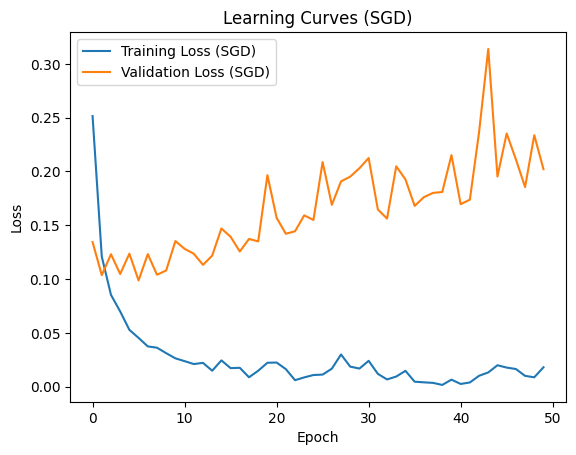

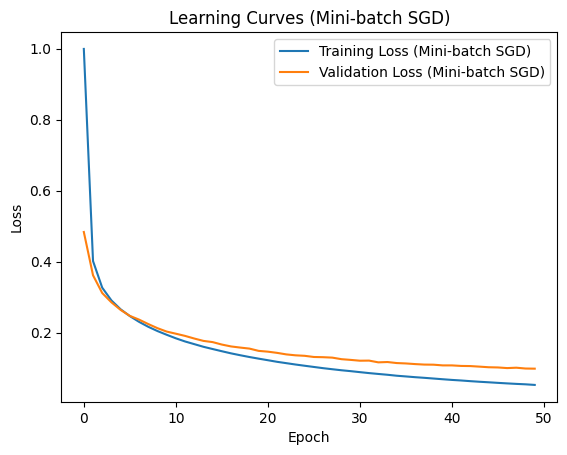

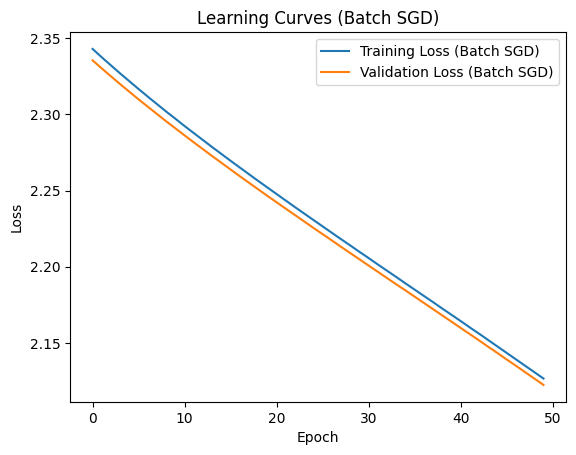

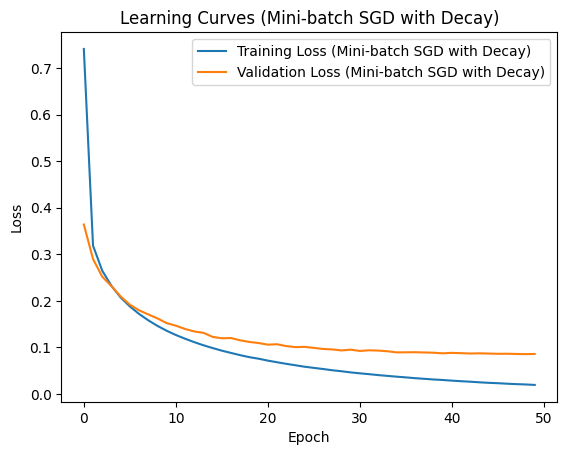

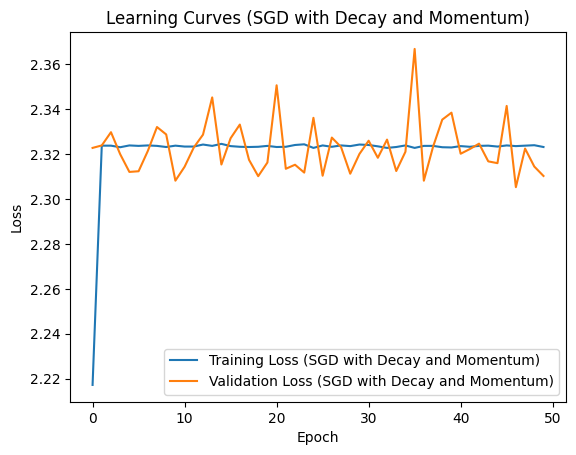

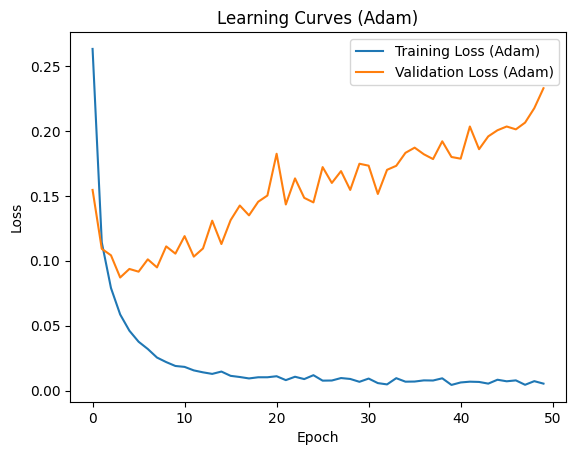

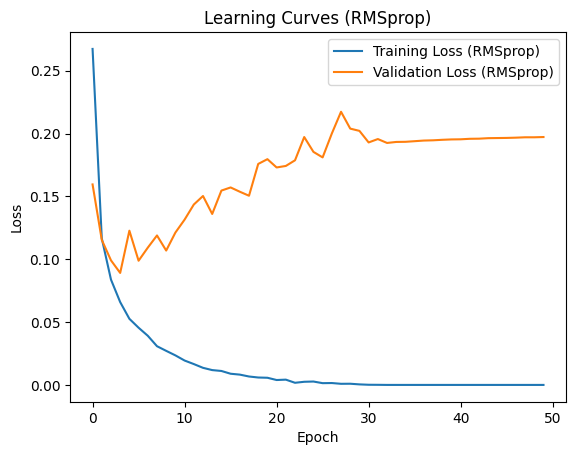

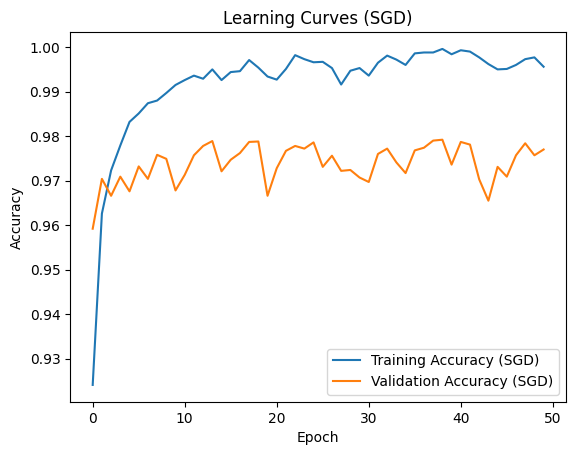

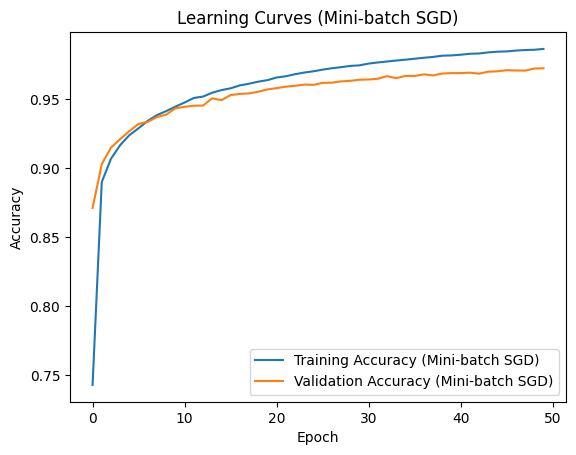

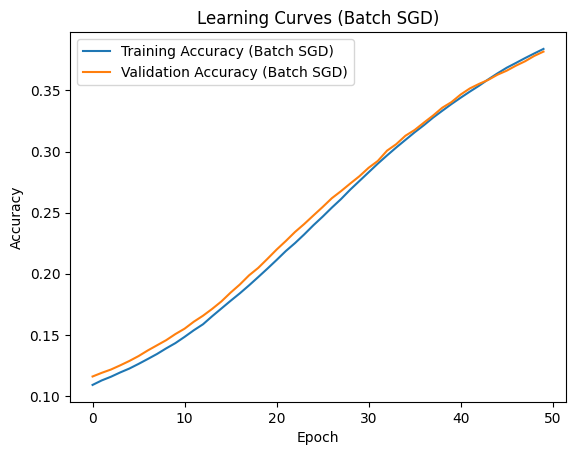

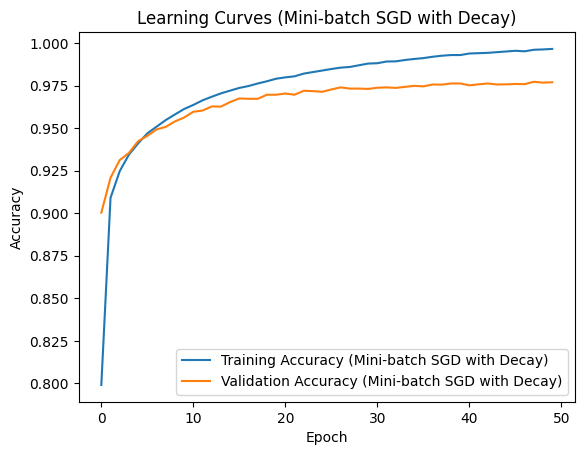

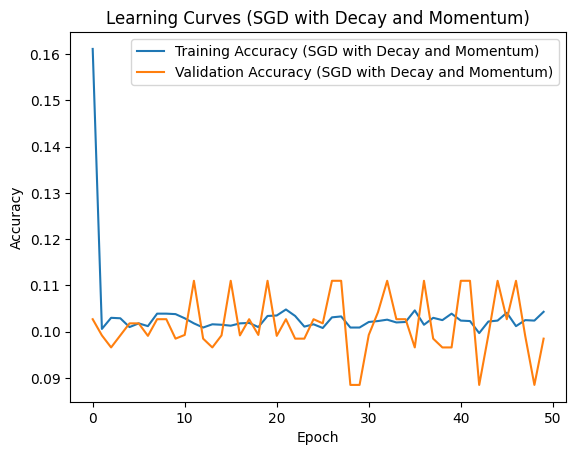

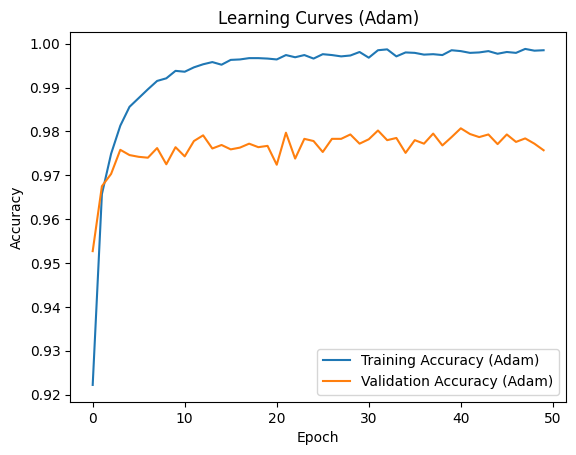

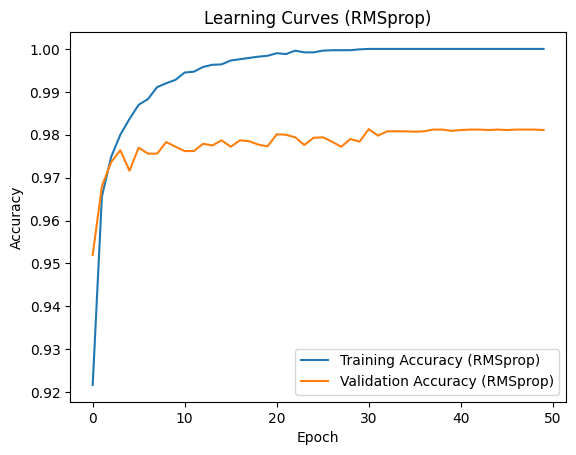

In [94]:

for optimizer in optimizers:
    plt.plot(models_history[optimizer]['loss'], label=f'Training Loss ({optimizer})')
    plt.plot(models_history[optimizer]['val_loss'], label=f'Validation Loss ({optimizer})')
    #plt.plot(models_history[optimizer]['accuracy'], label=f'Training Accuracy ({optimizer})')
    #plt.plot(models_history[optimizer]['val_accuracy'], label=f'Validation Accuracy ({optimizer})')
    plt.title(f'Learning Curves ({optimizer})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

for optimizer in optimizers:
    #plt.plot(models_history[optimizer]['loss'], label=f'Training Loss ({optimizer})')
    #plt.plot(models_history[optimizer]['val_loss'], label=f'Validation Loss ({optimizer})')
    plt.plot(models_history[optimizer]['accuracy'], label=f'Training Accuracy ({optimizer})')
    plt.plot(models_history[optimizer]['val_accuracy'], label=f'Validation Accuracy ({optimizer})')
    plt.title(f'Learning Curves ({optimizer})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



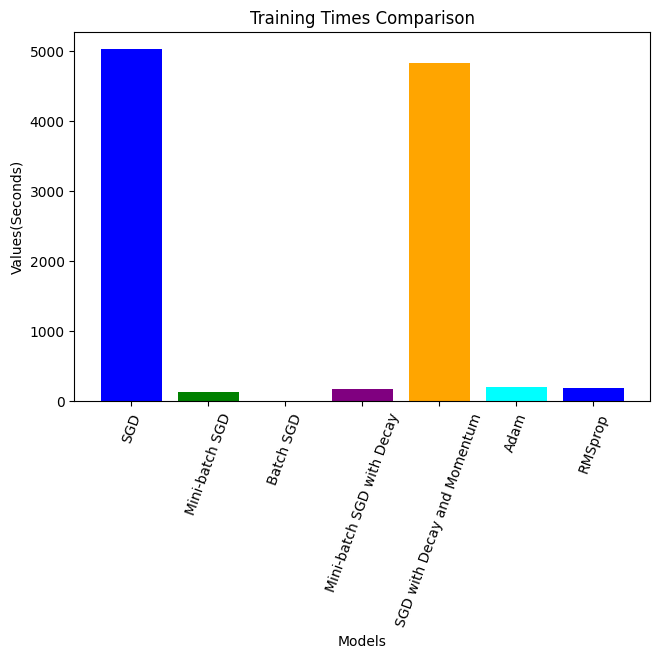

In [156]:

times = []
for optimizer, time in training_times.items():
  #print(f"{optimizer}: {time:.2f} seconds")
  times.append(time)
plt.subplots_adjust( wspace= 0.01 , left= 0.0001)
plt.bar(optimizers, times, color=['blue', 'green', 'red', 'purple', 'orange', 'aqua'])  # You can customize color
# Set labels and title
#for i, v in enumerate(training_times.items()):
  #plt.text(i, v[1] + 0.2, str(v[1]), ha='center', va='bottom', fontsize=10)  # Adjust positioning and formatting
plt.xlabel('Models')
plt.ylabel('Values(Seconds)')
plt.xticks(rotation=70)
plt.title('Training Times Comparison')
# Display the plot
plt.show()

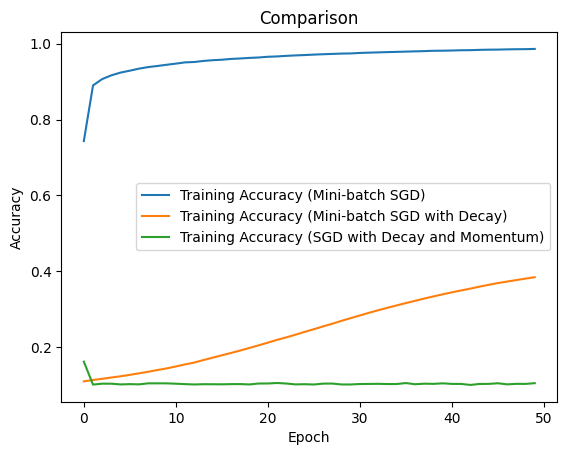

In [148]:

#plt.plot(models_history[optimizer]['loss'], label=f'Training Loss ({optimizer})')
#plt.plot(models_history[optimizer]['val_loss'], label=f'Validation Loss ({optimizer})')
plt.plot(models_history[optimizers[1]]['accuracy'], label=f'Training Accuracy ({optimizers[1]})')

plt.plot(models_history[optimizers[2]]['accuracy'], label=f'Training Accuracy ({optimizers[3]})')

plt.plot(models_history[optimizers[4]]['accuracy'], label=f'Training Accuracy ({optimizers[4]})')

plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


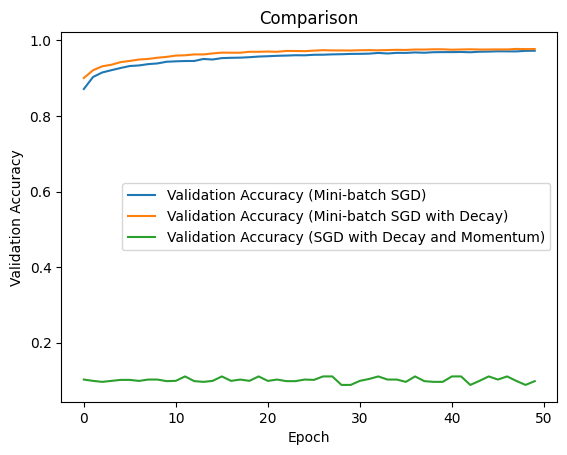

In [149]:
plt.plot(models_history[optimizers[1]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[1]})')
plt.plot(models_history[optimizers[3]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[3]})')
plt.plot(models_history[optimizers[4]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[4]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

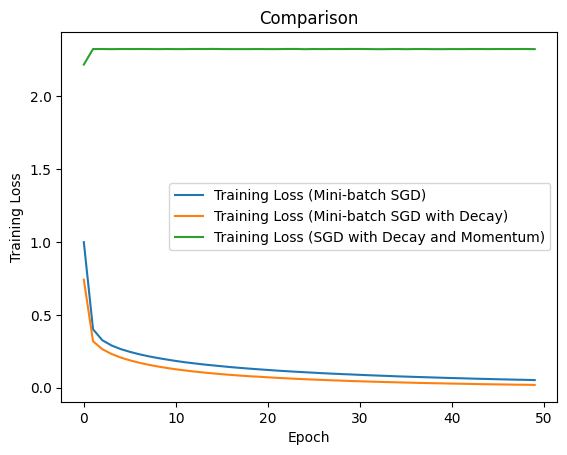

In [150]:
plt.plot(models_history[optimizers[1]]['loss'], label=f'Training Loss ({optimizers[1]})')
plt.plot(models_history[optimizers[3]]['loss'], label=f'Training Loss ({optimizers[3]})')
plt.plot(models_history[optimizers[4]]['loss'], label=f'Training Loss ({optimizers[4]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

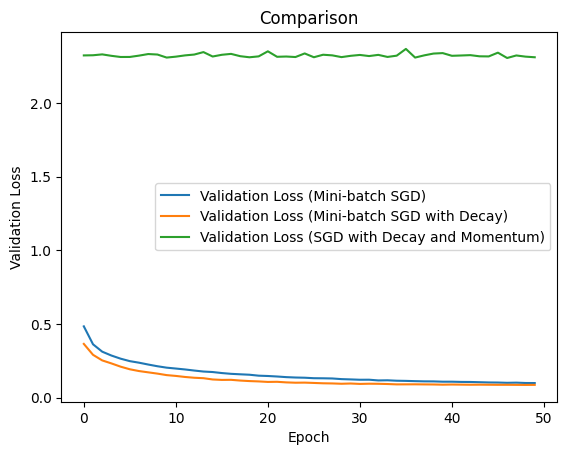

In [151]:
plt.plot(models_history[optimizers[1]]['val_loss'], label=f'Validation Loss ({optimizers[1]})')
plt.plot(models_history[optimizers[3]]['val_loss'], label=f'Validation Loss ({optimizers[3]})')
plt.plot(models_history[optimizers[4]]['val_loss'], label=f'Validation Loss ({optimizers[4]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

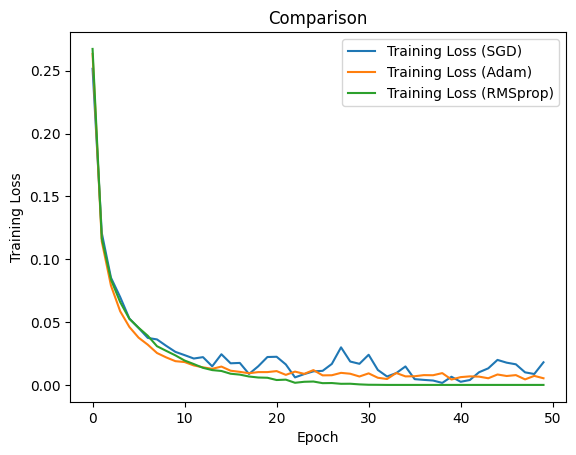

In [152]:
plt.plot(models_history[optimizers[0]]['loss'], label=f'Training Loss ({optimizers[0]})')
plt.plot(models_history[optimizers[5]]['loss'], label=f'Training Loss ({optimizers[5]})')
plt.plot(models_history[optimizers[6]]['loss'], label=f'Training Loss ({optimizers[6]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

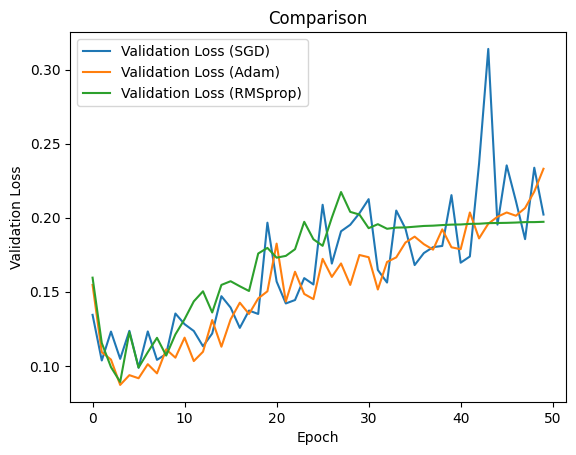

In [153]:
plt.plot(models_history[optimizers[0]]['val_loss'], label=f'Validation Loss ({optimizers[0]})')
plt.plot(models_history[optimizers[5]]['val_loss'], label=f'Validation Loss ({optimizers[5]})')
plt.plot(models_history[optimizers[6]]['val_loss'], label=f'Validation Loss ({optimizers[6]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

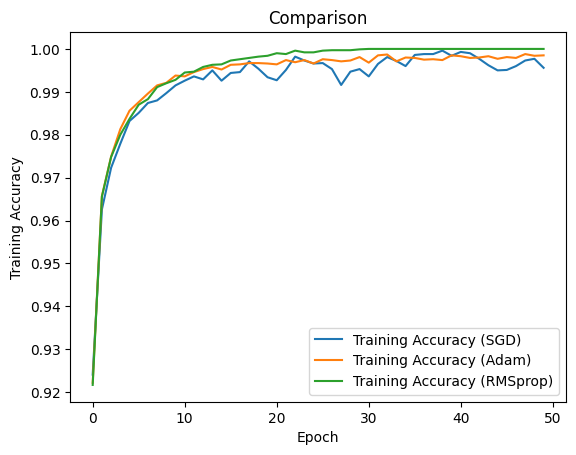

In [154]:
plt.plot(models_history[optimizers[0]]['accuracy'], label=f'Training Accuracy ({optimizers[0]})')
plt.plot(models_history[optimizers[5]]['accuracy'], label=f'Training Accuracy ({optimizers[5]})')
plt.plot(models_history[optimizers[6]]['accuracy'], label=f'Training Accuracy ({optimizers[6]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

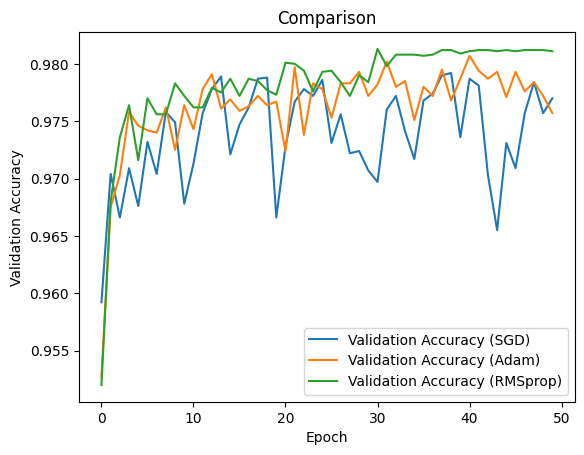

In [155]:
plt.plot(models_history[optimizers[0]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[0]})')
plt.plot(models_history[optimizers[5]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[5]})')
plt.plot(models_history[optimizers[6]]['val_accuracy'], label=f'Validation Accuracy ({optimizers[6]})')
plt.title(f'Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()